In [1]:
from keras import models
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
generator = models.load_model("generator-mnist-cgan.h5")
generator.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ label_input_layer   │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ label_embedding_la… │ (None, 1, 50)     │        500 │ label_input_laye… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noise_input_layer   │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 50)        │          0 │ label_embedding_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 6272)      │    633,472 │ noise_input_laye… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 6272)      │    319,872 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 7, 7, 128) │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 7, 7, 128) │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 7, 7, 256) │          0 │ reshape[0][0],    │
│ (Concatenate)       │                   │            │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 7, 7, 128) │    295,040 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 7, 7, 128) │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 14, 14,    │     73,792 │ up_sampling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 28, 28, 1) │        577 │ up_sampling2d_1[… │
│ (Conv2D)            │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,324,021 (5.05 MB)

 Trainable params: 1,323,637 (5.05 MB)

 Non-trainable params: 384 (1.50 KB)

In [3]:
model = models.load_model("mnist-cnn.h5")
model.summary()

c:\Users\shory\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 13, 13, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 5, 5, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 32)       │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,900 (132.43 KB)

 Trainable params: 33,898 (132.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [6]:
def model_check(model, plot=1, num_test_images=1000, generator=generator):

    rows = 10
    cols = 10
    
    max_plots = 100
    
    num_samples = num_test_images
    num_labels = 10
    noise_dim = 100
    
    noises = tf.random.normal([num_samples, noise_dim])

    test_labels = np.random.choice(num_labels, size=(num_samples, 1))
    label = tf.convert_to_tensor(test_labels, dtype=tf.int32)
    
    generated_imgs = generator([noises, label], training=False)
    
    predictions = model.predict(generated_imgs)
    
    correctly_predicted = 0
    incorrectly_predicted = 0
    
    if plot:
        plt.figure(figsize=(rows * 2, cols * 2))
        print(f"Model tested on ={num_samples} images.")
        print(f"Plotting top {min(max_plots,num_samples)} predicted and ground truth results.")
    
    for i in range(num_test_images):
        prediction = np.argmax(predictions[i])

        image = (generated_imgs[i, :, :, 0].numpy() * 127.5 + 127.5).astype("uint8")
        image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_CUBIC)
        image = cv2.merge([image] * 3)
        
        if prediction == test_labels[i]:
            correctly_predicted += 1
            rgb_color = (0, 255, 0)  # green for correct predictions
        else:
            incorrectly_predicted += 1
            rgb_color = (255, 0, 0)  # red for wrong predictions

        cv2.putText(image, str(prediction), (0, 18),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.75, rgb_color, 1)

        if plot and i < max_plots:
            plt.subplot(rows, cols, i + 1, title="label: %s" % test_labels[i])
            plt.axis('Off')  
            plt.imshow(image)
                
    if plot:
        plt.tight_layout()
        plt.show()
    

    accuracy = (correctly_predicted / num_test_images) * 100
    print(f"Number of correctly predicted samples: {correctly_predicted}")
    print(f"Number of incorrectly predicted samples: {incorrectly_predicted}")
    print(f"Accuracy of the model: {accuracy:.2f}%")

    return

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model tested on =1000 images.
Plotting top 100 predicted and ground truth results.


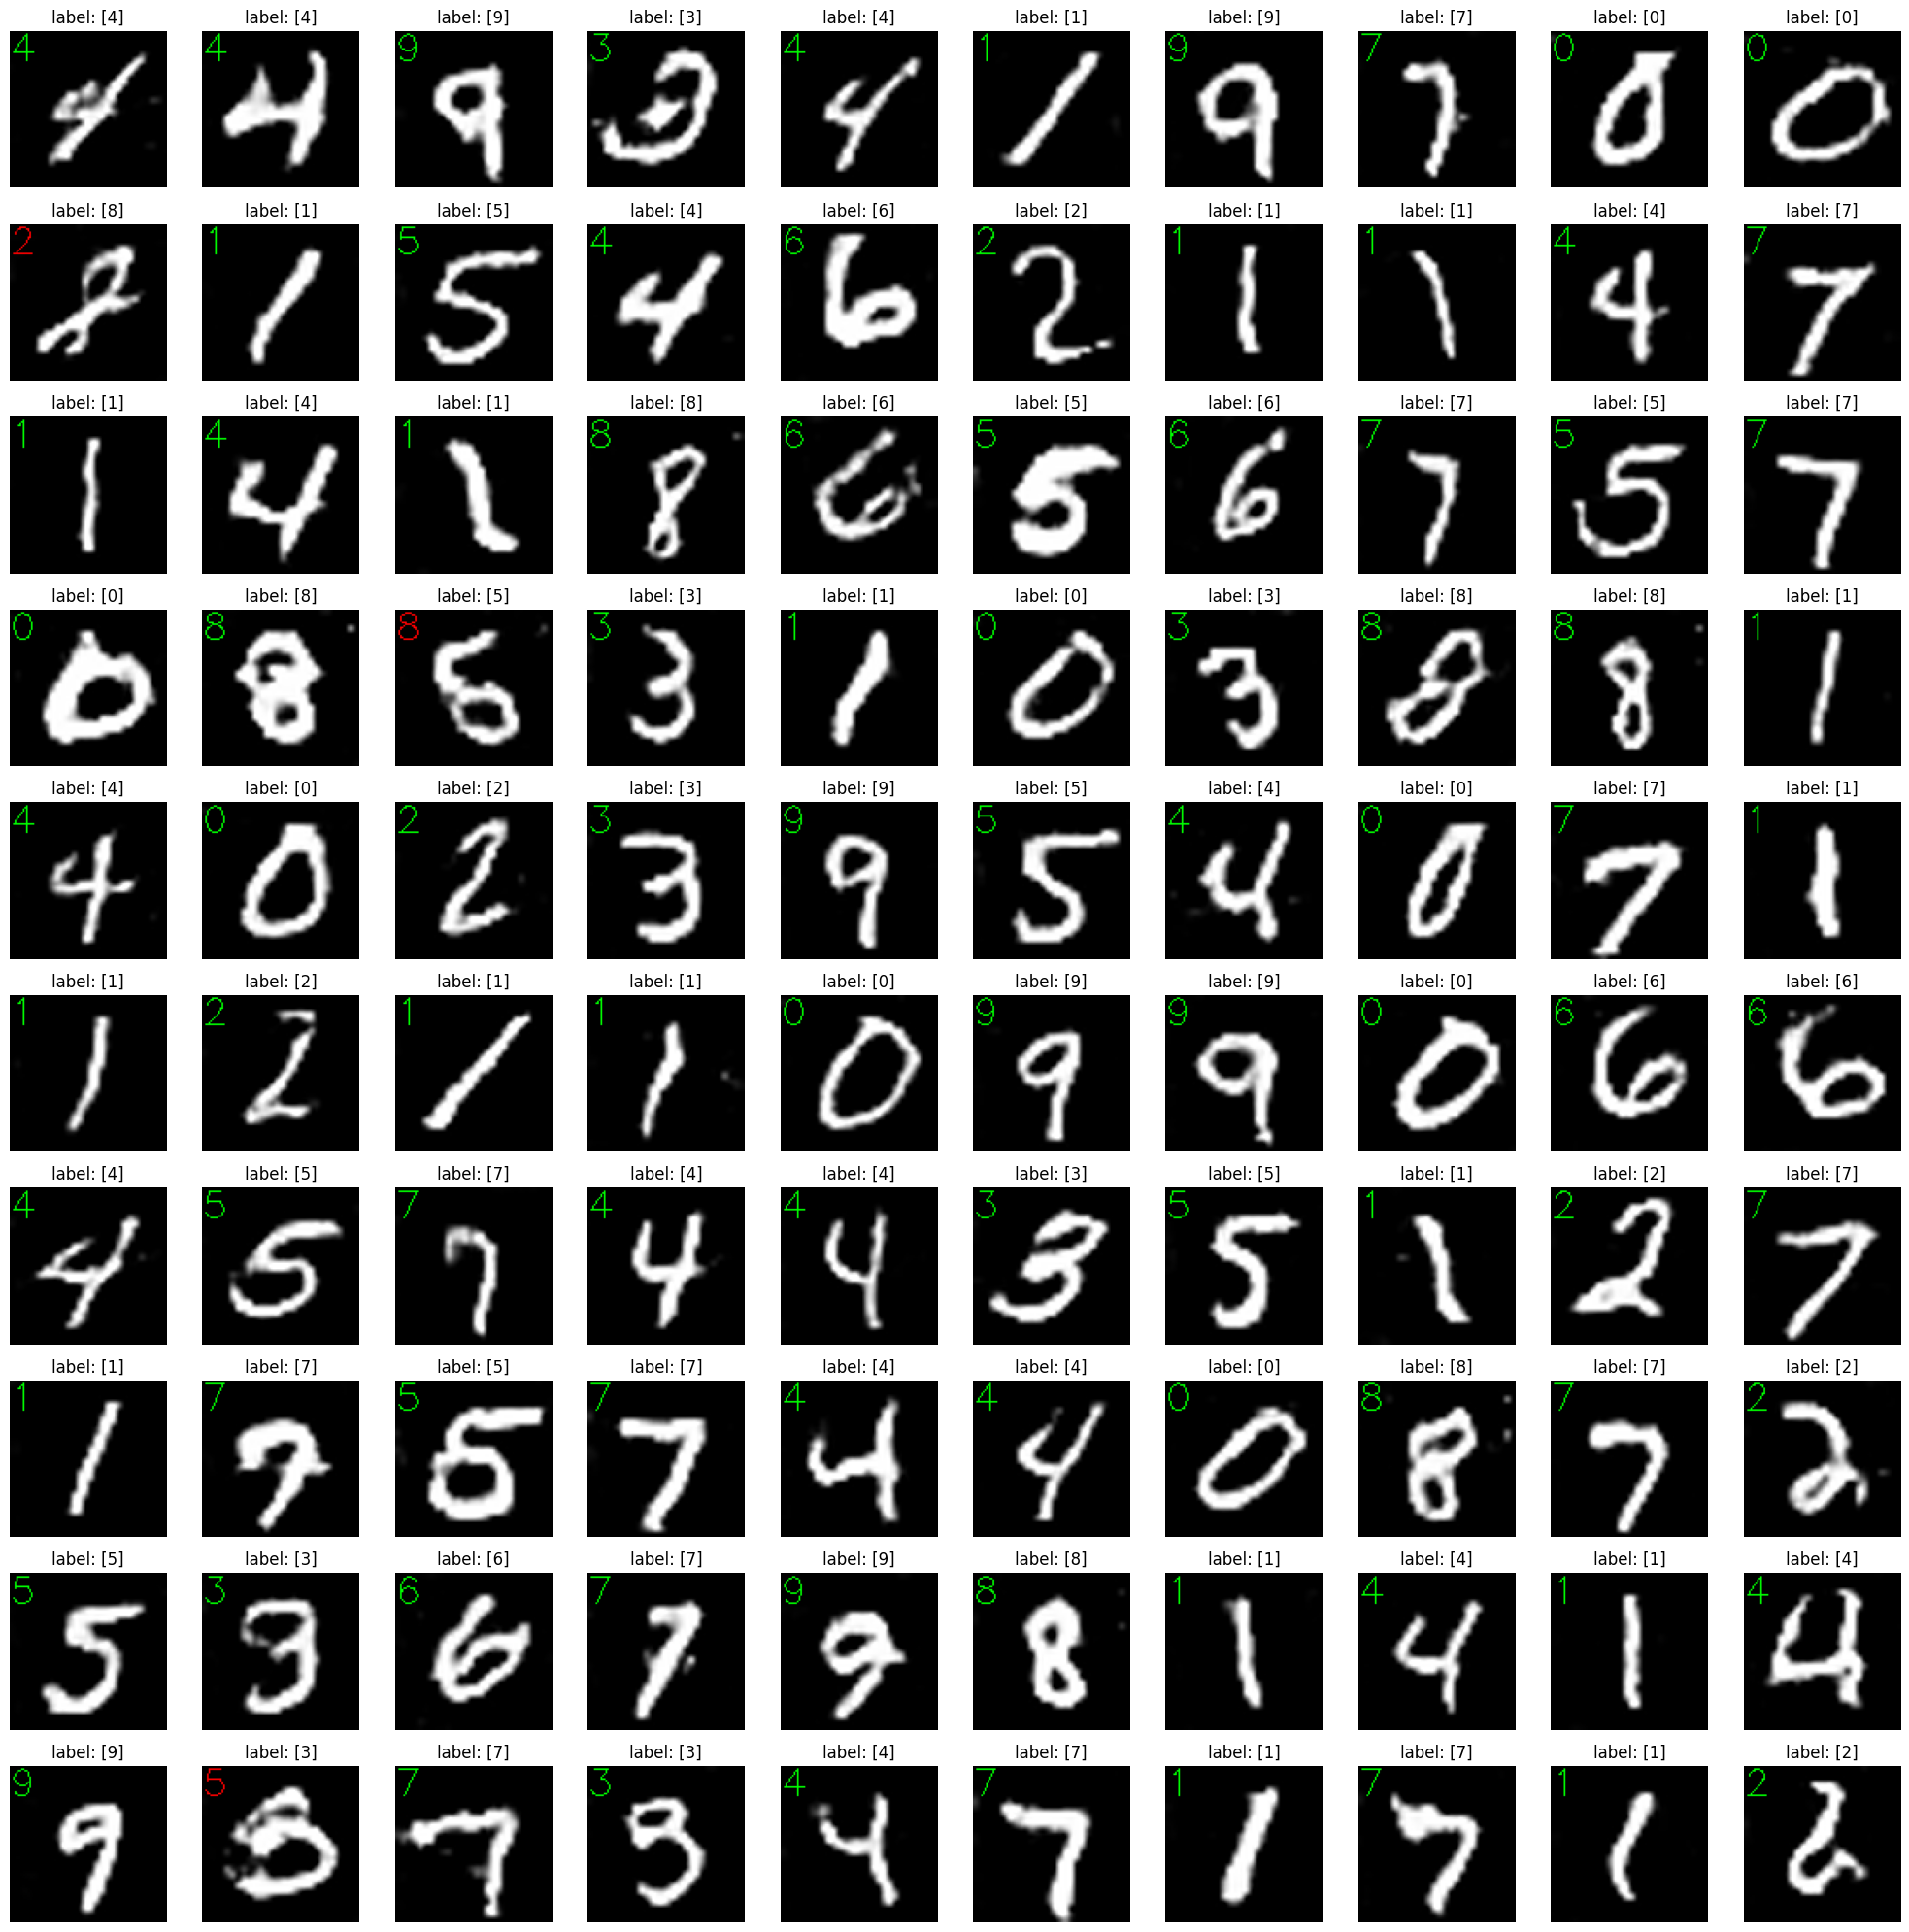

Number of correctly predicted samples: 979
Number of incorrectly predicted samples: 21
Accuracy of the model: 97.90%


In [7]:
model_check(model = model, plot = 1)